# Word Clouds Bigrams and trigrams - fake COVID19 dataset 

In order to create the word clous, we need the following packages:

### fake_trigrams_cloud.py and fake_bigrams_cloud.oy

In [1]:
from itertools import tee, islice 
import pandas as pd
import numpy as np
import json
import sys
import string
import re
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
import emoji
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder,TrigramCollocationFinder, TrigramAssocMeasures
from operator import itemgetter
import itertools
import contractions
from nltk.corpus import stopwords
import num2words
from PIL import Image

then we have defined the following functions to clean the tweets' text:

In [2]:
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_urls(text):
    result = re.sub(r"http\S+", "", text)
    return(result)

def remove_twitter_urls(text):
    clean = re.sub(r"pic.twitter\S+", "",text)
    return(clean)

def give_emoji_free_text(text):
    return emoji.get_emoji_regexp().sub(r'', text)

def noamp(text):
    clean = re.sub("&amp", " ",text)
    return (clean)

To read the JSON file that has all the tweets, it is necessary to do:

In [3]:
data = []
with open('grafici/fakecovid_result_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

We get:

In [4]:
data

[{'created_at': 'Tue Feb 11 15:03:22 +0000 2020',
  'id': 1227246758196998145,
  'id_str': '1227246758196998145',
  'full_text': 'Daily media briefing on #2019nCoV with @DrTedros https://t.co/rIOrFuLckE ',
  'truncated': False,
  'display_text_range': [0, 72],
  'entities': {'hashtags': [{'text': '2019ncov ', 'indices': [24, 33]}],
   'symbols': [],
   'user_mentions': [{'screen_name': 'DrTedros',
     'name': 'Tedros Adhanom Ghebreyesus',
     'id': 189868631,
     'id_str': '189868631',
     'indices': [39, 48]}],
   'urls': [{'url': 'https://t.co/rIOrFuLckE',
     'expanded_url': 'https://www.pscp.tv/w/cRK5ujI2MTAyMHwxWmtLekx3ZUxsWkp2UyshzLCVq_ErT2xAeYCeULUJhJmytWGPWcOvr7qJusc=',
     'display_url': 'pscp.tv/w/cRK5ujI2MTAy…',
     'indices': [49, 72]}]},
  'source': '<a href="https://periscope.tv" rel="nofollow">Periscope</a>',
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'in_reply_to_screen

We're interested in the "full_text" field

In [6]:
index=0
stop_words = stopwords.words('english')
new_bigram=[]
for element in data:
    data[index]['full_text'] = data[index]['full_text'].lower()#new - metto tutto minuscolo
    data[index]['full_text'] = contractions.fix(data[index]['full_text'])
    #data[index]['full_text'] = re.sub("\'\w+", '', data[index]['full_text'])#new - rimuove tutto quello dopo '
    data[index]['full_text'] = remove_urls(data[index]['full_text'])
    data[index]['full_text'] = remove_twitter_urls(data[index]['full_text'])
    data[index]['full_text'] = remove_emoticons(data[index]['full_text'])
    data[index]['full_text'] = remove_emoji(data[index]['full_text'])
    data[index]['full_text'] = give_emoji_free_text(data[index]['full_text'])
    data[index]['full_text'] = noamp(data[index]['full_text'])#new - no amp con lo spazio
    data[index]['full_text'] = re.sub("#\S+", " ",  data[index]['full_text'])#new - remove hashtag
    data[index]['full_text'] = re.sub("@\S+", " ",  data[index]['full_text'])#new - no mentions
    data[index]['full_text'] = data[index]['full_text'].translate(str.maketrans('', '', string.punctuation))#new - no puntuaction
    data[index]['full_text'] = data[index]['full_text'].encode('ascii', 'ignore').decode()#new - no unicode
    data[index]['full_text'] = re.sub("^rt ", " ", data[index]['full_text'])#new - no RT
    data[index]['full_text'] = re.sub('\s{2,}', " ", data[index]['full_text'])#new - remove big spaces
    bigram_tokens=list(nltk.bigrams(nltk.word_tokenize(data[index]['full_text'])))
    #print(bigram_tokens)
    clean_bigram_tokens = [gram for gram in bigram_tokens if not any(stop in gram for stop in stop_words)]
    new_bigram.append(clean_bigram_tokens)
    index=index+1

Create the list

In [7]:
list_bi=list(itertools.chain.from_iterable(new_bigram))
fdist_bi = dict(nltk.FreqDist(list_bi))
bi = {}
for k,v in fdist_bi.items():
    bi[" ".join(k)] = fdist_bi[k]
    bi[" ".join(k)] = v

#for x, y in bi.items():
#    print(x, y)

Then the word cloud is created and plotted

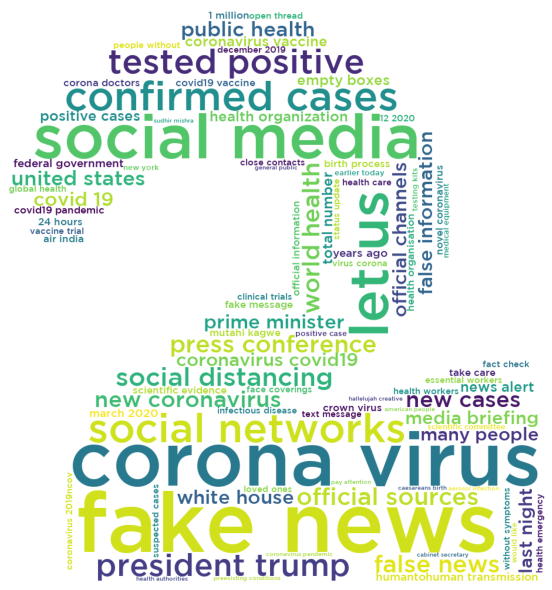

In [8]:
mask=np.array(Image.open('grafici/number_two.jpg'))

wordcloud_bi = WordCloud(
            mask=mask,
            width=mask.shape[1],
            height=mask.shape[0],
            background_color ='white', 
            min_word_length = 3,
            max_words=400,
            font_path = 'grafici/GothamMedium.ttf',
            min_font_size = 10).generate_from_frequencies(bi) 
  
#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_bi) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

#### Trigrams

In [9]:
index_tri=0
stop_words_tri = stopwords.words('english')
new_trigram=[]
for element in data:
    data[index_tri]['full_text'] = data[index_tri]['full_text'].lower()#new - metto tutto minuscolo
    data[index_tri]['full_text'] = contractions.fix(data[index_tri]['full_text'])
    #data[index_tri]['full_text'] = re.sub("\'\w+", '', data[index_tri]['full_text'])#new - rimuove tutto quello dopo '
    data[index_tri]['full_text'] = remove_urls(data[index_tri]['full_text'])
    data[index_tri]['full_text'] = remove_twitter_urls(data[index_tri]['full_text'])
    data[index_tri]['full_text'] = remove_emoticons(data[index_tri]['full_text'])
    data[index_tri]['full_text'] = remove_emoji(data[index_tri]['full_text'])
    data[index_tri]['full_text'] = give_emoji_free_text(data[index_tri]['full_text'])
    data[index_tri]['full_text'] = noamp(data[index_tri]['full_text'])#new - no amp con lo spazio
    data[index_tri]['full_text'] = re.sub("#\S+", " ",  data[index_tri]['full_text'])#new - remove hashtag
    data[index_tri]['full_text'] = re.sub("@\S+", " ",  data[index_tri]['full_text'])#new - no mentions
    data[index_tri]['full_text'] = data[index_tri]['full_text'].translate(str.maketrans('', '', string.punctuation))#new - no puntuaction
    data[index_tri]['full_text'] = data[index_tri]['full_text'].encode('ascii', 'ignore').decode()#new - no unicode
    data[index_tri]['full_text'] = re.sub("^rt ", " ", data[index_tri]['full_text'])#new - no RT
    data[index_tri]['full_text'] = re.sub(r'\b\d\b', lambda x: num2words.num2words(int(x.group(0))), data[index_tri]['full_text'])
    data[index_tri]['full_text'] = re.sub('\s{2,}', " ", data[index_tri]['full_text'])#new - remove big spaces
    trigram_tokens=list(nltk.trigrams(nltk.word_tokenize(data[index_tri]['full_text'])))
    #print(trigram_tokens)
    clean_trigram_tokens = [gram for gram in trigram_tokens if not any(stop in gram for stop in stop_words_tri)]
    new_trigram.append(clean_trigram_tokens)
    index_tri=index_tri+1

Create the dictionary

In [10]:
list_tri=list(itertools.chain.from_iterable(new_trigram))
fdist_tri = dict(nltk.FreqDist(list_tri))
tri = {}
for k,v in fdist_tri.items():
    tri[" ".join(k)] = fdist_tri[k]
    tri[" ".join(k)] = v

#for x, y in tri.items():
#    print(x, y)

Word Cloud

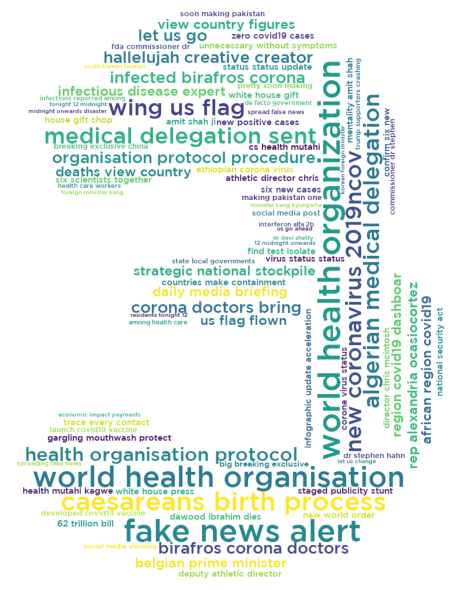

In [11]:
mask_tri=np.array(Image.open('grafici/number_three.jpg'))

wordcloud_tri = WordCloud(
            mask=mask_tri,
            width=mask_tri.shape[1],
            height=mask_tri.shape[0],
            background_color ='white', 
            min_word_length = 3,
            max_words=450,
            font_path = 'grafici/GothamMedium.ttf',
            min_font_size = 10).generate_from_frequencies(tri) 
  
#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_tri) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

